# What's the big picture? 
* Some problems are so difficult that no one researcher, research group, research institute, or multi-national company can make meaningful progress. It takes a world wide effort and collaborations between industry and academia. Drug discovery is one such area. Advances in data science (aka artificial intelligence, machine learning) are being applied to data sets from high-throughput experimental techniques and historical databases of biomedical literature, publicly available to the world community.

* The process of small molecule drug development involves the gradual reduction of tens of thousands of small molecules to a drug candidate that eventually is given to patients in clinical trials. This is a long (decades, often the whole career of a researcher), costly process and engages all corners of our interconnected economy (scientists, physicians, doctors, entrepreneurs, investors, pharmaceutical companies, government officials). These real world constraints pressure research questions to shy away from too much risk and leave many diseases untreated. But computational methods that have become popularized within the past decade can help make data driven decisions earlier in the decision making process, so that drugs can be developed better, faster, and cheaper. At this workshop you will get hands on experience solving the types of problems that keep our researchers up at night.

# The plan
* Input data: a precomputed and relatively clean data set of ~1000 drugs-like molecules by ~100 chemical features
* Goal: Your job is to categorize drug-like molecules into a smaller diverse and representative set. This is a real-world unsupervised multi-class classification problem encountered in a biotech startup. There is underlying structure in this data set and we have solved it one way and are curious to see how you solve it. 
* Hints: you will be given clues about the structure of the data at the event, but for now it's top secret! We have prepared Python code snippets (pandas, numpy, scikit-learn) for a solution using k-means clustering to move you along toward the goal within the time constraints of the event.
* This jupyter notebook is here to help facilitate the workshop

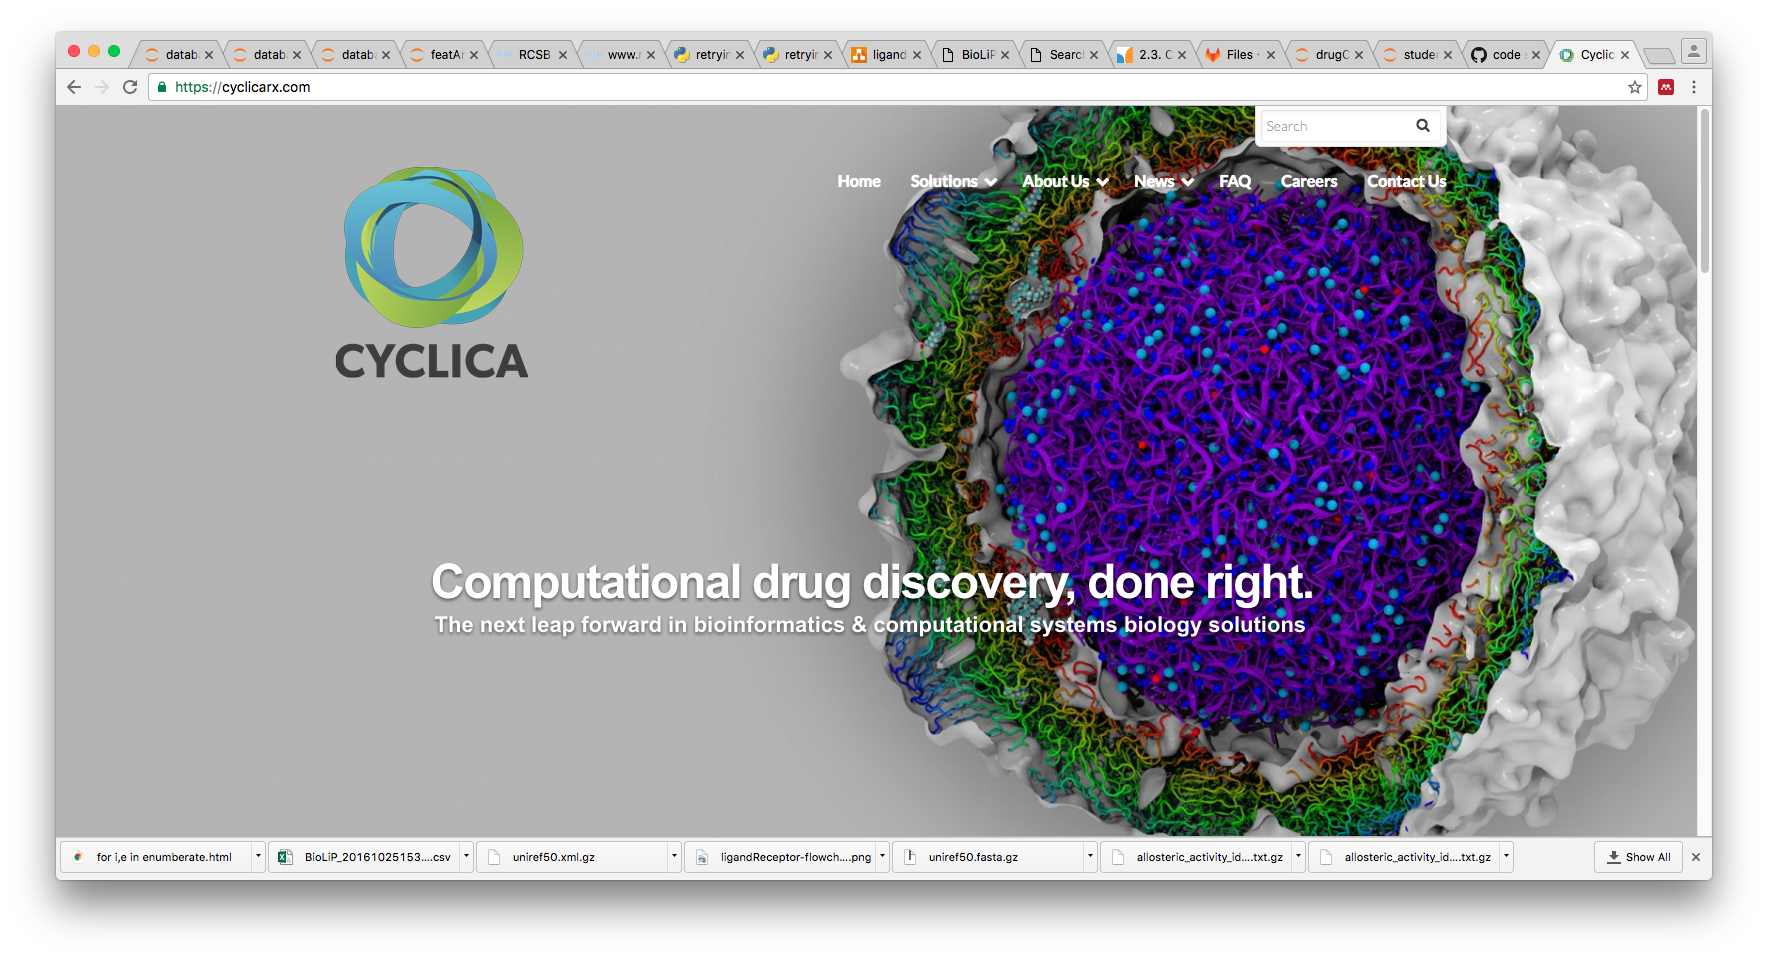

In [62]:
from IPython.display import Image
Image("Screen Shot 2016-10-27 at 3.29.58 PM.png")

# Technical remarks
* If you don't have pandas, numpy, scikit-learn, matplotlib, etc installed then do so with
> pip install pandas, numpy, scikit-learn, matplotlib
* You can check which libraries you have installed with
> pip freeze

## Import data

In [72]:
import pandas as pd
inputfile = 'chemicalDataForStudents20161027-110104.csv'
df = pd.read_csv(inputfile, sep=',')


In [64]:
# take a peak at the data
print df.shape
print df.tail(3)


(1650, 111)
       LabuteASA  MaxAbsEStateIndex  MaxAbsPartialCharge  MaxEStateIndex  \
1514  164.703793          14.880596             0.496768       14.880596   
161   148.584776           5.798308             0.493601        5.798308   
1220  138.515751          12.549085             0.347020       12.549085   

      MaxPartialCharge  MinAbsEStateIndex  MinAbsPartialCharge  \
1514          0.350866           0.002799             0.350866   
161           0.215753           0.686138             0.215753   
1220          0.244674           0.081001             0.244674   

      MinEStateIndex  MinPartialCharge  MolLogP         ...          \
1514       -0.875036         -0.496768  3.48928         ...           
161         0.686138         -0.493601  4.33182         ...           
1220       -0.668981         -0.347020  1.25950         ...           

      fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
1514                  0             0            0             0 

In [68]:
# the chemicals can be represented by a string.
print df.head().smiles

# each compound has a codeName
# the codeNames are how we will can refer to them after the analysis (rather than by row number or smiles)
print df.head().codeName 

525           Cc1cc(nc(c1)N)COC[C@H](CN)OCc2cc(cc(n2)N)C
526         Cc1cc(nc(c1)N)COCC[C@@H](CN)OCc2cc(cc(n2)N)C
527    Cc1cc(nc(c1)N)COC[C@@H]([C@H](C)OCc2cc(cc(n2)N...
528          Cc1cc(nc(c1)N)COC[C@@H](CN)OCc2cc(cc(n2)N)C
415    CC(C)(C)NC(=O)[C@@H](c1ccccc1)NC(=O)N(C)Cc2ccc...
Name: smiles, dtype: object
525              JamesClerkMaxwell-ErnstMayr
526                      BillNye-FrankHornby
527            CharlesLyell-ErwinSchrodinger
528                Empedocles-GustavKirchoff
415    CharlesAugustindeCoulomb-FrancisCrick
Name: codeName, dtype: object


# Cleaning the data
* Real data is messy. Data sanitization involves 
    * removing features or samples that didn't compute for all samples  
    * removing outliers that you suspect are artefacts or that will wildnly bias the predictions that come from the data
    * The data provided has been filtered a bit, bit be warned that this is an important part of the process and can take a long time

# Normalizing the data
* The features need to be treated equally. Just because units change from grams to kilograms does not mean there is a 100x difference
* There are various ways to standardize data. You may have read about standard scores (Z-statistic). In the end each feature should be centred around the same value and have the same max and min.
* The way this is done should preserve the variation in each feature. So remember your numerical methods computer science class and beware of subtracting errors and the like.

In [69]:
# just get features from data, remove labels
df_un = df.drop(['codeName', 'smiles'], 1)

# normalize
import numpy as np
df_norm = (df_un - df_un.mean()) / (df_un.max() - df_un.min())
X = np.array(df_norm)

# X is basically scaled to be between 1 and zero in way that is robust to real word data
# you can uncomment this to check
# print 'mean', np.mean(X,0)
# print 'max', np.max(X,0)
# print 'min', np.min(X,0) 

# K-means clustering
* Read these links
    * https://en.wikipedia.org/wiki/K-means_clustering
    * http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* K-means clustering comes up with labels for unlabelled data. It takes the data and a parameter (we call it k here) that fixes the number of clusters
* Try out different values of k using the code below
* The key line of code below is
> y_pred = KMeans(n_clusters=k, random_state=random_state).fit_predict(X)
* It takes the normalized data and asigns cluster labels to it, such that there are k unique clusters.
* Properties of k
    * k is integer, since clusters are countable
    * k is at least 1. This would be one big cluster
    * k is at most teh number of samples (the rows of X). This would treat every sample as its own cluster (a singleton) 

In [71]:
# cluster by kmeans
from sklearn.cluster import KMeans
import random
random.seed(0)
k = int(random.uniform(1, len(X))) # set k without any prior knowledge... any number between 1 and the number of samples
print 'k', k
random_state = 0
y_pred = KMeans(n_clusters=k, random_state=random_state).fit_predict(X)
df['y_pred'] = y_pred # plot and analyze unnormalized data with labels

k 1393


* Now that the clustering is done we can look at the sizes of the clsuters. The function 
>np.histogram
* outputs two arrays, [the number of clusters of a given size], [the size of the clusters]

In [22]:
# look at cluster size
print np.histogram(df.groupby('y_pred').size(), bins = np.append(np.unique(df.groupby( ["y_pred"] ).size()), np.max(df.groupby( ["y_pred"] ).size())+1))
# add in cluster size to df
df = pd.merge(df, pd.DataFrame({'clusterSize_y_pred' : df.groupby( ["y_pred"] ).size()}).reset_index(), on='y_pred') 
print df.tail()

(array([1161,  208,   23,    1]), array([1, 2, 3, 4, 5]))
       LabuteASA  MaxAbsEStateIndex  MaxAbsPartialCharge  MaxEStateIndex  \
1645  147.806545          14.525346             0.378511       14.525346   
1646  149.812648          12.574862             0.477880       12.574862   
1647  181.229439          14.001653             0.460949       14.001653   
1648  203.683877          11.743598             0.438042       11.743598   
1649  124.973421          11.101663             0.507823       11.101663   

      MaxPartialCharge  MinAbsEStateIndex  MinAbsPartialCharge  \
1645          0.154401           0.031220             0.154401   
1646          0.330899           0.050841             0.330899   
1647          0.258894           0.164579             0.258894   
1648          0.233112           0.053390             0.233112   
1649          0.230804           0.042424             0.230804   

      MinEStateIndex  MinPartialCharge  MolLogP         ...          \
1645       -0.910

In [51]:
# get top clusters
topClusters=df[['y_pred', 'clusterSize_y_pred']].drop_duplicates().sort_values(by='clusterSize_y_pred', ascending=[0]).head()
print topClusters


      y_pred  clusterSize_y_pred
525      142                   4
1103     199                   3
341       57                   3
36      1233                   3
546      218                   3


# Sanity check... 2d chemical structures
* do the compunds in the same clusters look the same?
* use this webtool to check https://cactus.nci.nih.gov/gifcreator/

# Submit you classes to Cyclica
* Since we know the real clusters by another method we can compare your to ours
* Output your final list of y_pred classes with the codeNames and smiles and we can go back and check if they are the same as our classes
* The code below outputs a csv file. Details of how to submit will be given at the workshop


In [61]:
# sort data
df = df.sort_values(by=['clusterSize_y_pred', 'y_pred'], ascending=[0,1])

# output data
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
initials='gw'
output = 'predictedClasses' + initials + timestr +'.csv'
df.to_csv(output, sep=',', index=False)
df.head(50)

,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,smiles,codeName,y_pred,clusterSize_y_pred
525,141.729151,5.759574,0.383683,5.759574,0.123477,0.226210,0.123477,-0.226210,-0.383683,1.31854,...,0,0,0,0,0,0,Cc1cc(nc(c1)N)COC[C@H](CN)OCc2cc(cc(n2)N)C,JamesClerkMaxwell-ErnstMayr,142,4
526,148.094093,5.819164,0.383683,5.819164,0.123477,0.098079,0.123477,-0.098079,-0.383683,1.70864,...,0,0,0,0,1,0,Cc1cc(nc(c1)N)COCC[C@@H](CN)OCc2cc(cc(n2)N)C,BillNye-FrankHornby,142,4
527,148.094093,6.124918,0.383683,6.124918,0.123477,0.181412,0.123477,-0.259896,-0.383683,1.70704,...,0,0,0,0,0,0,Cc1cc(nc(c1)N)COC[C@@H]([C@H](C)OCc2cc(cc(n2)N...,CharlesLyell-ErwinSchrodinger,142,4
528,141.729151,5.759574,0.383683,5.759574,0.123477,0.226210,0.123477,-0.226210,-0.383683,1.31854,...,0,0,0,0,0,0,Cc1cc(nc(c1)N)COC[C@@H](CN)OCc2cc(cc(n2)N)C,Empedocles-GustavKirchoff,142,4
415,185.862478,12.947534,0.477530,12.947534,0.339488,0.007434,0.339488,-1.177893,-0.477530,2.91090,...,0,0,0,0,0,1,CC(C)(C)NC(=O)[C@@H](c1ccccc1)NC(=O)N(C)Cc2ccc...,CharlesAugustindeCoulomb-FrancisCrick,6,3
416,185.862478,12.911895,0.477530,12.911895,0.339488,0.003046,0.339488,-1.172572,-0.477530,2.91250,...,0,0,0,0,1,1,CCCCNC(=O)[C@H](c1ccccc1)NC(=O)N(C)Cc2ccc3c(c2...,WolfgangErnstPauli-Lucretius,6,3
417,201.824746,13.056169,0.477530,13.056169,0.339488,0.016616,0.339488,-1.181843,-0.477530,3.31260,...,0,0,0,0,0,1,CN(Cc1ccc2c(c1C(=O)O)OCO2)C(=O)N[C@@H](c3ccccc...,ErwinSchrodinger-EvangelistaTorricelli,6,3
151,112.519202,12.044467,0.504068,12.044467,0.200850,0.003845,0.200850,-0.738647,-0.504068,2.57680,...,0,0,0,0,0,0,c1ccc(cc1)C2=CC(=O)c3c(cc(c(c3O)O)O)O2,LinusPauling-IsaacNewton,36,3
152,123.997689,12.233506,0.507966,12.233506,0.203372,0.033681,0.203372,-0.472106,-0.507966,2.58540,...,0,0,0,0,0,0,COc1c(cc2c(c1O)C(=O)C=C(O2)c3ccc(cc3)O)O,CarlFriedrichGauss-BillNye,36,3
153,112.519202,12.350655,0.507822,12.350655,0.199995,0.009887,0.199995,-0.312312,-0.507822,2.57680,...,0,0,0,0,0,0,c1cc(c(cc1C2=COc3cc(ccc3C2=O)O)O)O,SigmundFreud-BenjaminFranklin,36,3


# More ideas
* in case you've gotten this far you can explore
    * plotting the distribution of features and comaring between y_pred classes
    * dimensionality rediction with principle components analysis http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    * features selection: features that describe the most variation between classes
    
